In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telecom-churn/telecom_churn.csv


In [2]:
df = pd.read_csv('../input/telecom-churn/telecom_churn.csv', sep=',', header = 0)
#df = df.set_index('hn')
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [3]:
df.isnull().any()

Churn              False
AccountWeeks       False
ContractRenewal    False
DataPlan           False
DataUsage          False
CustServCalls      False
DayMins            False
DayCalls           False
MonthlyCharge      False
OverageFee         False
RoamMins           False
dtype: bool

In [4]:
df.describe() #show data โดยรวม
# meanของคนย้ายค่ายได้ 0.14 ข้อมูล imbalance ละ มีปัญหา

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [5]:
y = df['Churn'] # label
X = df.drop(['Churn'],axis = 1)#features

In [6]:
X

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...
3328,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [7]:
y.unique() # label มี2ค่า คือ 0 กับ 1
# np.unique(y)

array([0, 1])

In [8]:
y.sum() # มี label 1 อยู่ 483 ตัว
# np.sum(y)

483

In [9]:
len(y)-y.sum() # ความต่างละหว่าง label ต่างกัน 2850 คือโครต imbalance คือมี label = 0 อยู่ 2850
# np.sum(1-y)

2850

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [11]:
X_train.shape # มีข้อมูล train 2666

(2666, 10)

In [12]:
X_test.shape # มีข้อมูล test 667

(667, 10)

In [13]:
np.sum(y_train)

395

In [14]:
np.sum(1-y_train)

2271

In [15]:
np.sum(y_test)

88

In [16]:
np.sum(1-y_test)

579

y_test กับ y_train ห่างกันมาก

# Model train - OLD (Slow)

In [17]:
#ทำโมเดล train RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler # *normalization
from sklearn.ensemble import RandomForestClassifier # model
from sklearn.model_selection import GridSearchCV # *GridSearchCV
from sklearn.pipeline import Pipeline # Pipeline

params = {
    'n_estimators' : [10,20,50,100,200]
}

clf = Pipeline([
  ('scaler', MinMaxScaler(feature_range=(0, 1))), 
  ('classification', GridSearchCV(RandomForestClassifier(random_state=0),params, cv = 10))
])

clf.fit(X_train, y_train) # เอา X_train, y_train เข้ามาtrain model

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classification',
                 GridSearchCV(cv=10,
                              estimator=RandomForestClassifier(random_state=0),
                              param_grid={'n_estimators': [10, 20, 50, 100,
                                                           200]}))])

In [18]:
from sklearn.model_selection import cross_val_score
acc = cross_val_score(clf, X_train, y_train, cv=10)
print("10CV Training Accuracy : "+str(acc.mean()))

10CV Training Accuracy : 0.9358635352426008


In [19]:
y_predict = clf.predict(X_test)
acc = sum(y_predict == y_test)/len(y_test)
print("Test accuracy : "+str(acc))

Test accuracy : 0.9385307346326837


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_predict, y_test))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       588
           1       0.72      0.80      0.75        79

    accuracy                           0.94       667
   macro avg       0.84      0.88      0.86       667
weighted avg       0.94      0.94      0.94       667



In [21]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_predict))
#ทาย 0 0 ถูก 563
#ทาย 0 แต่คือ 1 ได้ 16
#ทาย 1 1 ถูก 63
#ทาย 1 แต่คือ 0 ได้ 25

[[563  16]
 [ 25  63]]


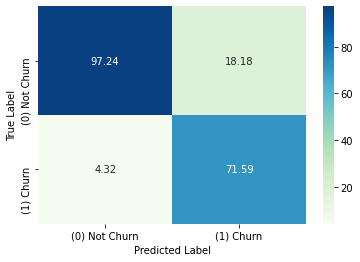

In [22]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['(0) Not Churn', '(1) Churn']
C = confusion_matrix(y_test,y_predict)
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt=".2f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

#คือ 0 ทายว่า 0 ถูก 97%
#คือ 0 แต่ทายว่า 1 ได้ 18%

#คือ 1 ทายว่า 1 ถูก 71%
#คือ 1 แต่ทายว่า 0 ได้ 4% 

# Model train - V.new  (good)

In [23]:
#ทำโมเดล train
from sklearn.preprocessing import MinMaxScaler # *normalization
from sklearn.ensemble import RandomForestClassifier # model
from sklearn.model_selection import GridSearchCV # *GridSearchCV
from sklearn.pipeline import Pipeline # Pipeline

clf = Pipeline([
  ('scaler', MinMaxScaler(feature_range=(0, 1))), 
  ('classification', RandomForestClassifier(random_state=0))
])

In [24]:
params = {
    'classification__n_estimators' : [10,20,50,100,200]
}
best_clf = GridSearchCV(clf, params ,cv=10)
best_clf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('classification',
                                        RandomForestClassifier(random_state=0))]),
             param_grid={'classification__n_estimators': [10, 20, 50, 100,
                                                          200]})

In [25]:
best_clf.best_params_

{'classification__n_estimators': 100}

In [26]:
print("10CV Training Accuracy : "+str(best_clf.best_score_))

10CV Training Accuracy : 0.9351130635577707


In [27]:
y_predict = best_clf.predict(X_test)
acc = sum(y_predict == y_test)/len(y_test)
print("Test accuracy : "+str(acc))

Test accuracy : 0.9385307346326837


![](https://i1.sndcdn.com/artworks-000491630706-o6935j-t500x500.jpg)

# Model train - V.new + feature_selection <br>
# RandomForestClassifier จารใช้

In [28]:
#RandomForestClassifier
# สร้างต้นไม้เล็กๆหลายๆต้น แล้ว นำต้นที่ดีที่สุดทุกต้น นำมารวมกัน
from sklearn.preprocessing import MinMaxScaler 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif 

clf = Pipeline([
  ('scaler', MinMaxScaler(feature_range=(0, 1))), 
  ('feature_selection', SelectKBest(f_classif)),
  ('classification', RandomForestClassifier(random_state=0))
])

In [29]:
params = {
    'feature_selection__k' : [3,5,7],
    'classification__n_estimators' : [10,20,50,100,200],
    'classification__max_depth' : [3,5,7]
}
best_clf = GridSearchCV(clf, params ,cv=10)
best_clf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('feature_selection', SelectKBest()),
                                       ('classification',
                                        RandomForestClassifier(random_state=0))]),
             param_grid={'classification__max_depth': [3, 5, 7],
                         'classification__n_estimators': [10, 20, 50, 100, 200],
                         'feature_selection__k': [3, 5, 7]})

In [30]:
best_clf.best_params_

{'classification__max_depth': 7,
 'classification__n_estimators': 50,
 'feature_selection__k': 7}

In [31]:
print("10CV Training Accuracy : "+str(best_clf.best_score_))

10CV Training Accuracy : 0.9291177381656388


In [32]:
y_predict = best_clf.predict(X_test)
acc = sum(y_predict == y_test)/len(y_test)
print("Test accuracy : "+str(acc))

Test accuracy : 0.9295352323838081


# SVC

In [33]:
#SVC
from sklearn.preprocessing import MinMaxScaler 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif 

clf = Pipeline([
  ('scaler', MinMaxScaler(feature_range=(0, 1))), 
  ('feature_selection', SelectKBest(f_classif)),
  ('classification', SVC(random_state=0))
])

In [34]:
params = {
    'feature_selection__k' : [3,5,7],
    'classification__C' : [1,2,4,8,16,32],
    'classification__gamma' : [0.0625,0.0125,0.025,0.05,0.01,0,1,2,4,8,16,32]
}
best_clf = GridSearchCV(clf, params ,cv=10)
best_clf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('feature_selection', SelectKBest()),
                                       ('classification',
                                        SVC(random_state=0))]),
             param_grid={'classification__C': [1, 2, 4, 8, 16, 32],
                         'classification__gamma': [0.0625, 0.0125, 0.025, 0.05,
                                                   0.01, 0, 1, 2, 4, 8, 16,
                                                   32],
                         'feature_selection__k': [3, 5, 7]})

In [35]:
best_clf.best_params_

{'classification__C': 32,
 'classification__gamma': 4,
 'feature_selection__k': 7}

In [36]:
print("10CV Training Accuracy : "+str(best_clf.best_score_))

10CV Training Accuracy : 0.9156106558531159


In [37]:
y_predict = best_clf.predict(X_test)
acc = sum(y_predict == y_test)/len(y_test)
print("Test accuracy : "+str(acc))

Test accuracy : 0.9220389805097451


![](https://i.ytimg.com/vi/Q1qpG7gwix4/maxresdefault.jpg)

# ExtraTreesClassifier จารใช้

In [38]:
#ExtraTreesClassifier
# สร้างต้นไม้เล็กๆหลายๆต้น แล้ว นำต้นไม้หลายๆต้นความสูขไม่เท่ากัน นำมารวมกัน
# ไม่ค่อยต่างจาก Randomforestมาก
from sklearn.preprocessing import MinMaxScaler 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline 

#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import f_classif 

clf = Pipeline([
  ('scaler', MinMaxScaler(feature_range=(0, 1))), 
  #('feature_selection', SelectKBest(f_classif)),
  ('classification', ExtraTreesClassifier(random_state=0))
])

In [39]:
params = {
    'classification__n_estimators' : [10,20,50,100,200],
}
best_clf = GridSearchCV(clf, params ,cv=10)
best_clf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('classification',
                                        ExtraTreesClassifier(random_state=0))]),
             param_grid={'classification__n_estimators': [10, 20, 50, 100,
                                                          200]})

In [40]:
best_clf.best_params_

{'classification__n_estimators': 200}

In [41]:
print("10CV Training Accuracy : "+str(best_clf.best_score_))

10CV Training Accuracy : 0.9298555377207063


In [42]:
y_predict = best_clf.predict(X_test)
acc = sum(y_predict == y_test)/len(y_test)
print("Test accuracy : "+str(acc))

Test accuracy : 0.9250374812593704


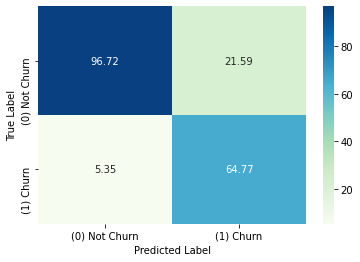

In [43]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['(0) Not Churn', '(1) Churn']
C = confusion_matrix(y_test,y_predict)
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt=".2f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# หา best_estimator_ (features)ที่สำคัญสุด

In [44]:
best_clf.best_estimator_.steps

[('scaler', MinMaxScaler()),
 ('classification', ExtraTreesClassifier(n_estimators=200, random_state=0))]

In [45]:
best_clf.best_estimator_.steps[1]
# 0 = scaler
# 1 = classification หรือ -1 ก็ได้ เพราะแปลว่าตัวสุดท้าย

('classification', ExtraTreesClassifier(n_estimators=200, random_state=0))

In [46]:
f = best_clf.best_estimator_.steps[-1][1].feature_importances_
f

array([0.07042887, 0.07255904, 0.02574699, 0.05180713, 0.15808602,
       0.17833695, 0.07211594, 0.19021937, 0.09295035, 0.08774935])

In [47]:
f_idx = np.argsort(-f) #เรียงมากไปน้อย
f_idx

array([7, 5, 4, 8, 9, 1, 6, 0, 3, 2])

In [48]:
X.columns

Index(['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [49]:
X.columns.values[f_idx]
# สิ่งที่ใช้ดูว่าผู้ใช้จะเปลี่ยนค่ายอันดับ1คือ MonthlyCharge
# อันดับ2คือ DayMins
# ...

array(['MonthlyCharge', 'DayMins', 'CustServCalls', 'OverageFee',
       'RoamMins', 'ContractRenewal', 'DayCalls', 'AccountWeeks',
       'DataUsage', 'DataPlan'], dtype=object)

# ทำ select form embaited model

In [50]:
#เอาไว้ก่อน

การบ้าน ไปทำเปน smote ลองสร้าง model ที่ดีสุด || train acc 93 จะดีมาก

![](https://i.imgflip.com/1tzeet.jpg?a452736)